In [1]:
## This sample program performs binary addition using RNN in Keras
# Method 2 is much faster than Method 1

import numpy as np
import sys
import os
import random
import keras


#change the working directory 
os.chdir('/notebooks/torch')

print("This program runs on version 2.0.6")
print("keras version "+keras.__version__)

Using TensorFlow backend.


This program runs on version 2.0.6
keras version 2.0.6


In [23]:
print(X[0,...])
print(y[0,...])

[[1 0 0 1]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 0 1]]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [30]:
# Each bit has 0 and 1 , i.e. two features
def genData():
    a1=random.randint(0,127)
    a2=random.randint(0,127)
    a3=a1+a2
    tmp1=np.unpackbits(np.uint8(a1))
    tmp2=np.unpackbits(np.uint8(a2))
    y=np.unpackbits(np.uint8(a3))
    tmp1=tmp1[::-1]
    tmp2=tmp2[::-1]
    y=y[::-1]
    ones=np.ones((8), dtype=np.int)
    flipped1=ones-tmp1
    flipped2=ones-tmp2
    flippedy=ones-y
    
    tmp1=np.reshape(tmp1, (8,1))
    tmp2=np.reshape(tmp2, (8,1))
    flipped1=np.reshape(flipped1, (8,1))
    flipped2=np.reshape(flipped2, (8,1))
    
    X=np.concatenate((tmp1, flipped1, tmp2, flipped2),1)
    y=np.reshape(y,(8,1))
    flippedy=np.reshape(flippedy, (8,1))
    y=np.concatenate((y, flippedy),1)

    X=np.expand_dims(X,0)
    y=np.expand_dims(y,0)
    return(X,y)

In [31]:
a,b=genData()
print(a)
print(b)

[[[0 1 1 0]
  [1 0 0 1]
  [1 0 1 0]
  [1 0 1 0]
  [1 0 0 1]
  [0 1 1 0]
  [1 0 1 0]
  [0 1 0 1]]]
[[[1 0]
  [1 0]
  [0 1]
  [1 0]
  [0 1]
  [0 1]
  [1 0]
  [1 0]]]


In [32]:
tmpX, tmpy=genData()
X=tmpX
y=tmpy
# Note the total combination is 127 x 127
NumSample=1000
print("Sample Percentage: "+str(NumSample/(127.*127.)*100))
for i in range(NumSample-1):
  tmpX, tmpy=genData()
  X=np.insert(X, 1, tmpX, axis=0)
  y=np.insert(y, 1, tmpy, axis=0)


Sample Percentage: 6.20001240002


In [33]:
print(X.shape)
print(y.shape)

(1000, 8, 4)
(1000, 8, 2)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

print("Training Sample Percentage: "+str(X_train.shape[0]/(127.*127.)*100))


(670, 8, 4)
(670, 8, 2)
Training Sample Percentage: 4.15400830802


In [36]:
# Build the model.
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint

isCheckpoint=False

model = Sequential()
#model.add(LSTM(256, input_dim=max_features, return_sequences=True))
feature_dim=4
model.add(LSTM(10, input_shape=(None, feature_dim), return_sequences=True))
#model.add(LSTM(256, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dense(2))  #is it dense? or add(LSTM(max_features))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


# It is a best practice to use checkpoint 
callbacks_list=None
if isCheckpoint==True:
  filepath="weight/RNN_BinaryAddition_Method_2-{epoch:02d}-{val_loss:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]

history=model.fit(X_train, y_train, validation_split=0.15 ,batch_size=32, epochs=100,callbacks=callbacks_list)

print("finished")


Train on 569 samples, validate on 101 samples
Epoch 1/100
569/569 [==============================] - 0s - loss: 0.6927 - val_loss: 0.6918
Epoch 2/100
569/569 [==============================] - 0s - loss: 0.6916 - val_loss: 0.6914
Epoch 3/100
569/569 [==============================] - 0s - loss: 0.6905 - val_loss: 0.6911
Epoch 4/100
569/569 [==============================] - 0s - loss: 0.6893 - val_loss: 0.6910
Epoch 5/100
569/569 [==============================] - 0s - loss: 0.6880 - val_loss: 0.6902
Epoch 6/100
569/569 [==============================] - 0s - loss: 0.6871 - val_loss: 0.6897
Epoch 7/100
569/569 [==============================] - 0s - loss: 0.6861 - val_loss: 0.6892
Epoch 8/100
569/569 [==============================] - 0s - loss: 0.6853 - val_loss: 0.6895
Epoch 9/100
569/569 [==============================] - 1s - loss: 0.6843 - val_loss: 0.6884
Epoch 10/100
569/569 [==============================] - 0s - loss: 0.6836 - val_loss: 0.6879
Epoch 11/100
569/569 [===========

569/569 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0010
Epoch 89/100
569/569 [==============================] - 0s - loss: 9.1087e-04 - val_loss: 7.4298e-04
Epoch 90/100
569/569 [==============================] - 0s - loss: 6.9880e-04 - val_loss: 5.6925e-04
Epoch 91/100
569/569 [==============================] - 0s - loss: 5.3445e-04 - val_loss: 4.3528e-04
Epoch 92/100
569/569 [==============================] - 0s - loss: 4.0669e-04 - val_loss: 3.2880e-04
Epoch 93/100
569/569 [==============================] - 0s - loss: 3.0837e-04 - val_loss: 2.4822e-04
Epoch 94/100
569/569 [==============================] - 0s - loss: 2.3384e-04 - val_loss: 1.9082e-04
Epoch 95/100
569/569 [==============================] - 0s - loss: 1.7785e-04 - val_loss: 1.4440e-04
Epoch 96/100
569/569 [==============================] - 0s - loss: 1.3431e-04 - val_loss: 1.0812e-04
Epoch 97/100
569/569 [==============================] - 0s - loss: 1.0131e-04 - val_loss: 8.2403e-05
Epoch 98/10

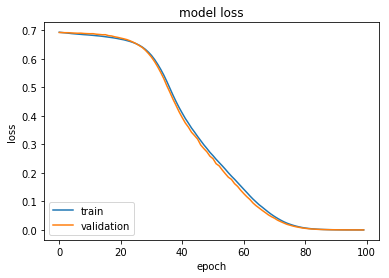

In [37]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [38]:
score = model.evaluate(X_test, y_test, batch_size=1)

# predict(self, x, batch_size=32, verbose=0)

327/330 [============================>.] - ETA: 0s

In [39]:
print("score: "+str(score))

score: 4.01945055163e-05


In [40]:
print(X_test.shape)

(330, 8, 4)


In [41]:
predict_y=model.predict(X_test)

In [42]:
print(predict_y.shape)

(330, 8, 2)


In [43]:
print(X_test[0,...])  

[[0 1 1 0]
 [0 1 0 1]
 [0 1 0 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [0 1 0 1]]


In [44]:
print(predict_y[0,...])  

[[  9.99981284e-01   1.86856269e-05]
 [  8.96038637e-06   9.99991059e-01]
 [  1.14123704e-05   9.99988556e-01]
 [  9.99995470e-01   4.52318500e-06]
 [  9.99990463e-01   9.58954388e-06]
 [  2.83432255e-05   9.99971628e-01]
 [  5.49040851e-05   9.99945045e-01]
 [  9.99994993e-01   5.01345812e-06]]


In [ ]:
#10001001

In [ ]:
#Another test   001110000011 + 001110000110 = 011100001001

In [79]:
a=np.zeros((1,12,4))

In [80]:
for i in range(a.shape[1]):
  a[0,i,1]=1
  a[0,i,3]=1


In [82]:
a[0,0,0]=1
a[0,0,1]=0

a[0,1,2]=1
a[0,1,3]=0

a[0,2,0]=1
a[0,2,1]=0

a[0,3,2]=1
a[0,3,3]=0

a[0,7,0]=1
a[0,7,1]=0

a[0,7,2]=1
a[0,7,3]=0

a[0,8,0]=1
a[0,8,1]=0

a[0,8,2]=1
a[0,8,3]=0

a[0,9,0]=1
a[0,9,1]=0

a[0,9,2]=1
a[0,9,3]=0


In [83]:
print(a) #  001110000101 + 001110001010 

[[[ 1.  0.  0.  1.]
  [ 0.  1.  1.  0.]
  [ 1.  0.  0.  1.]
  [ 0.  1.  1.  0.]
  [ 0.  1.  0.  1.]
  [ 0.  1.  0.  1.]
  [ 0.  1.  0.  1.]
  [ 1.  0.  1.  0.]
  [ 1.  0.  1.  0.]
  [ 1.  0.  1.  0.]
  [ 0.  1.  0.  1.]
  [ 0.  1.  0.  1.]]]


In [84]:
print(model.predict(a)) #ANS: 011100001111

[[[  9.99957204e-01   4.27893174e-05]
  [  9.99995947e-01   4.03458216e-06]
  [  9.99994755e-01   5.20382719e-06]
  [  9.99994993e-01   4.98259988e-06]
  [  4.98904274e-06   9.99994993e-01]
  [  5.91561820e-06   9.99994040e-01]
  [  1.37963125e-05   9.99986172e-01]
  [  4.24461432e-05   9.99957561e-01]
  [  9.99880552e-01   1.19394950e-04]
  [  9.99189913e-01   8.10047204e-04]
  [  9.99995947e-01   4.04740786e-06]
  [  6.90245179e-06   9.99993086e-01]]]
